# Dataset

In [2]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
boston = datasets.load_boston()
x, y = boston.data[:, 1:3], boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

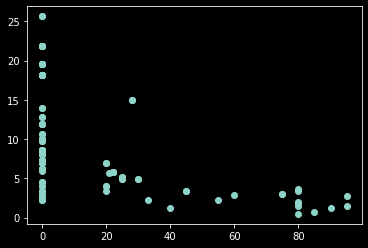

Min: [0.   0.46]
Max: [95.   25.65]
Mean: [11.84210526 10.91763158]
Std:[24.62911875  6.71750519]


In [12]:
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.show()

print(f"Min: {np.min(x_test, axis = 0)}")
print(f"Max: {np.max(x_test, axis = 0)}")
print(f"Mean: {np.mean(x_test, axis = 0)}")
print(f"Std:{np.std(x_test, axis = 0)}")

## MinMaxScaler

In [16]:
class MinMaxScaler:
    def __init__(self):
        self.data_min: np.ndarray = None
        self.data_max: np.ndarray = None
    
    def fit(self, x: np.ndarray):
        self.data_min = np.min(x, axis = 0)
        self.data_max = np.max(x, axis = 0)

    def transform(self, x: np.ndarray):
        x_transformed = (x - self.data_min) / (self.data_max - self.data_min)
        return x_transformed

In [22]:
scaler = MinMaxScaler()
scaler.fit(x)
x_train_transformed = scaler.transform(x)
x_test_transformed = scaler.transform(x)

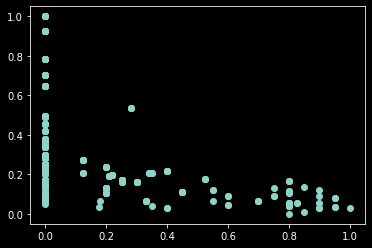

Min: [0. 0.]
Max: [1. 1.]
Mean: [0.11363636 0.39137752]
Std:[0.23299396 0.25123059]


In [23]:
plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1])
plt.show()

print(f"Min: {np.min(x_test_transformed, axis = 0)}")
print(f"Max: {np.max(x_test_transformed, axis = 0)}")
print(f"Mean: {np.mean(x_test_transformed, axis = 0)}")
print(f"Std:{np.std(x_test_transformed, axis = 0)}")

## Standard-Scaler

In [29]:
class StandardScaler:
    def __init__(self):
        self.mean_: np.ndarray = None
        self.scale_: np.ndarray = None
    
    def fit(self, x: np.ndarray):
        self.mean_ = np.mean(x, axis = 0)
        self.scale_ = np.std(x, axis = 0)

    def transform(self, x: np.ndarray):
        x_transformed = (x - self.mean_) / (self.scale_) # Division durch 0? --> Exception
        return x_transformed

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

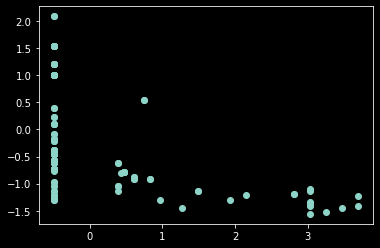

Min: [-0.49151868 -1.55895417]
Max: [3.69323401 2.08699409]
Mean: [ 0.03012639 -0.0453383 ]
Std:[1.08491338 0.97227774]


In [35]:
plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1])
plt.show()

print(f"Min: {np.min(x_test_transformed, axis = 0)}")
print(f"Max: {np.max(x_test_transformed, axis = 0)}")
print(f"Mean: {np.mean(x_test_transformed, axis = 0)}")
print(f"Std:{np.std(x_test_transformed, axis = 0)}")